## 데이터 읽기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('test.csv')

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train_df.isnull().sum()/len(train_df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [9]:
test_df.isnull().sum()/len(test_df)

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

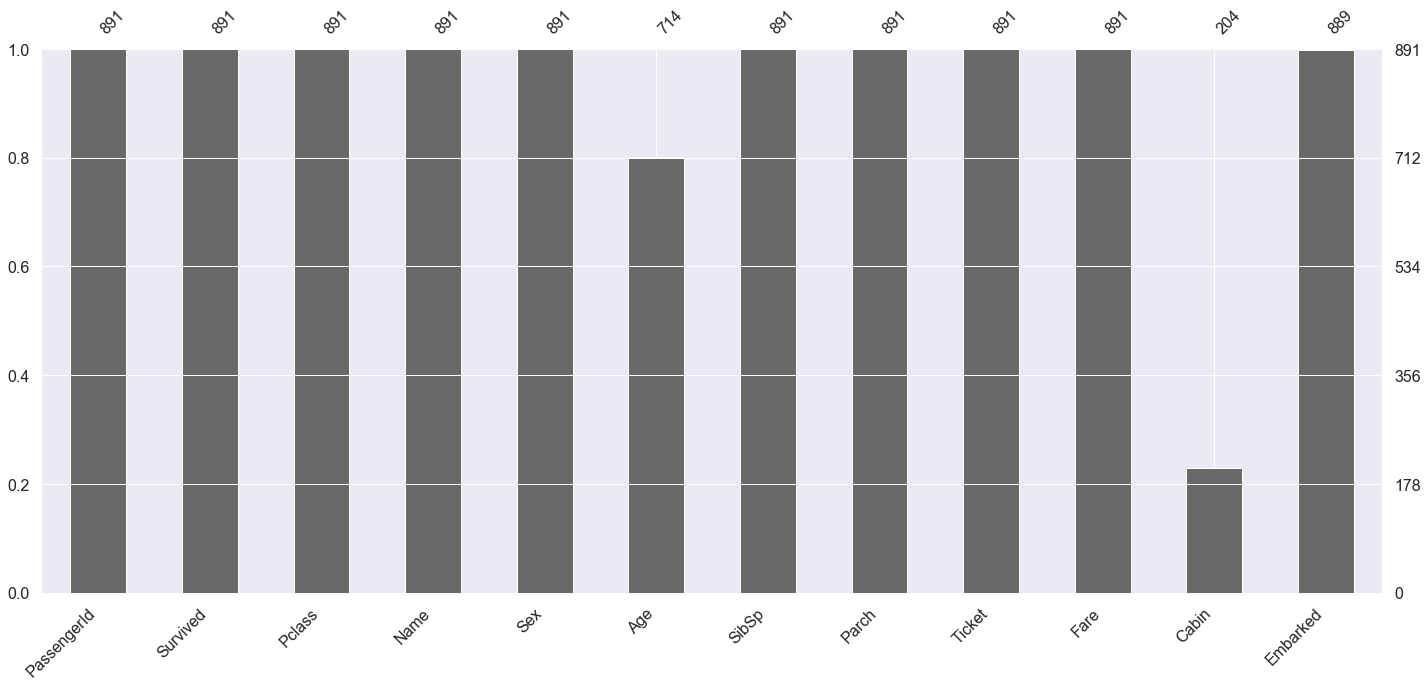

In [10]:
import missingno as msno
msno.bar(df = train_df)

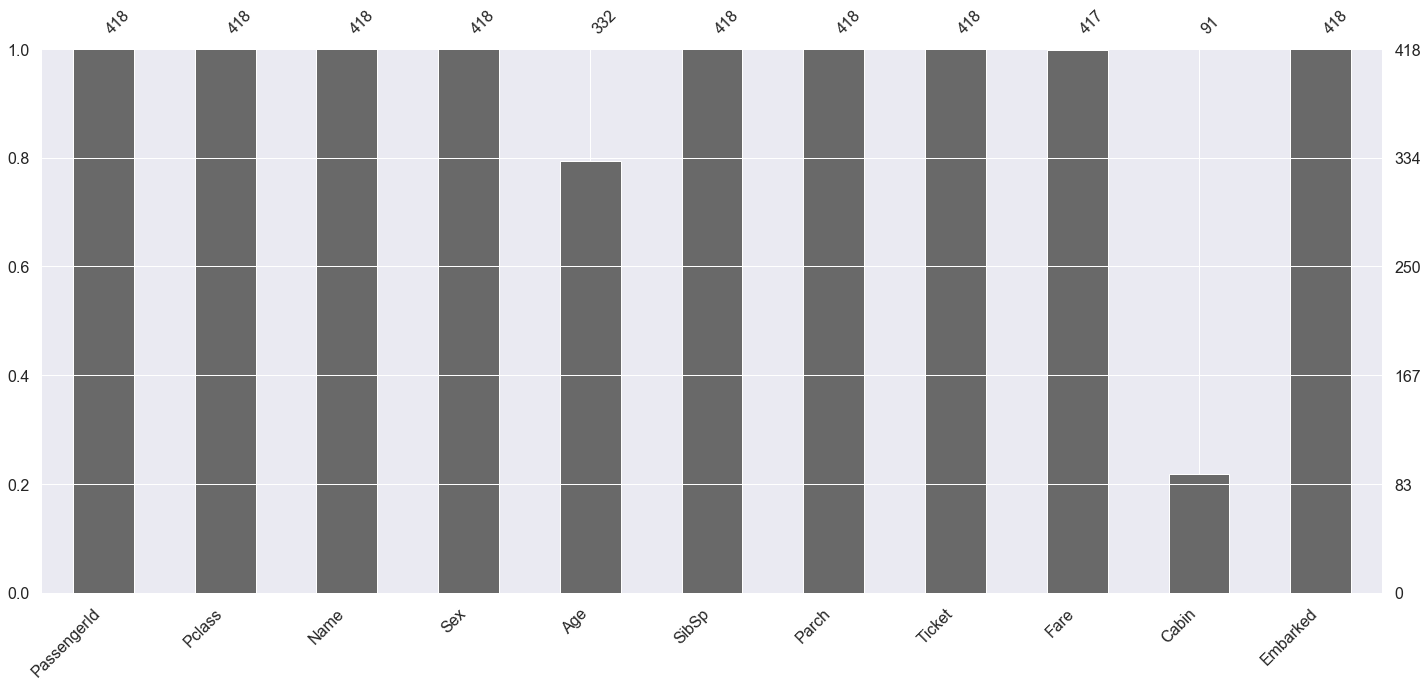

In [11]:
msno.bar(df = test_df)

## 생존과 연관 된 컬럼 찾기
### - Pclass 컬럼 : Pclass가 좋을수록 생존률 높음

In [12]:
train_df.Survived == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [13]:
train_df[train_df.Survived == 1].Pclass.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [14]:
pd.crosstab(train_df.Pclass, train_df.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


### - Sex 컬럼 : 여성이 생존 확률이 높음

In [15]:
pd.crosstab(train_df.Sex, train_df.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


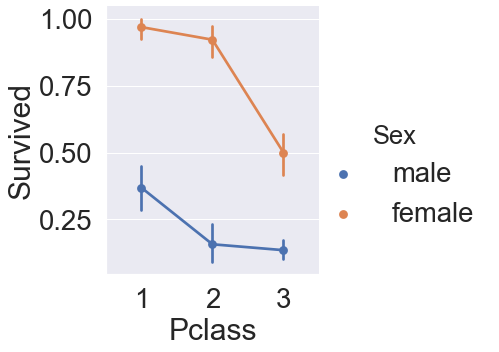

In [16]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = train_df)

### - Age 컬럼 : 나이 어린 사람이 생존 확률이 높음

In [17]:
surv_age = train_df.Age[train_df.Survived == 1]
surv_age

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

In [18]:
dead_age = train_df.Age[train_df.Survived == 0]
dead_age

0      22.0
4      35.0
5       NaN
6      54.0
7       2.0
       ... 
884    25.0
885    39.0
886    27.0
888     NaN
890    32.0
Name: Age, Length: 549, dtype: float64

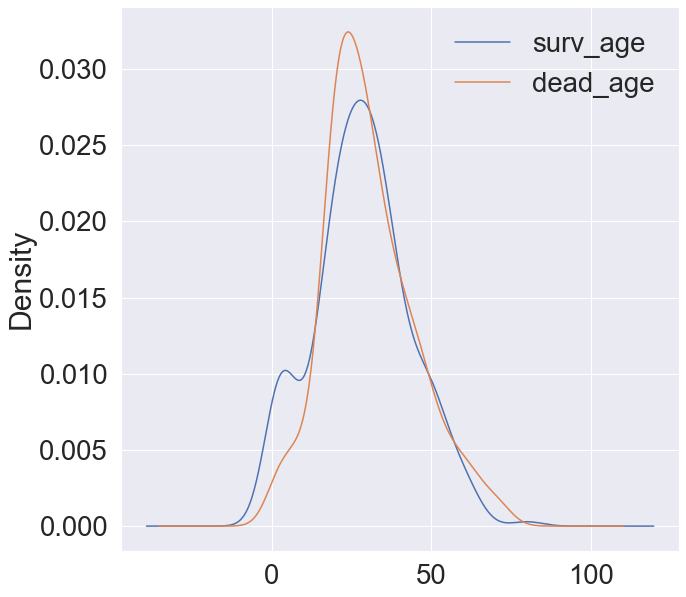

In [19]:
plt.figure(figsize=(10,10))
surv_age.plot(kind = 'kde')
dead_age.plot(kind = 'kde')
plt.legend(['surv_age','dead_age'])

### - Embarked 컬럼 : 비슷한 생존률, C가 높은것은 Pclass가 높은 사람이 많이 타서

In [20]:
pd.crosstab(train_df.Embarked, train_df.Survived, margins=True)

Survived,0,1,All
Embarked,,,
C,75,93,168
Q,47,30,77
S,427,217,644
All,549,340,889


In [21]:
pd.crosstab(train_df.Embarked, train_df.Pclass, margins=True)

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


## 상관관계 & 기울임 정보

In [22]:
train_df.corr().Survived

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [23]:
train_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [24]:
test_df.skew()

PassengerId    0.000000
Pclass        -0.534170
Age            0.457361
SibSp          4.168337
Parch          4.654462
Fare           3.687213
dtype: float64

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

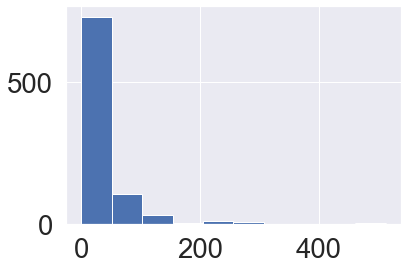

In [25]:
plt.hist(train_df.Fare)

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

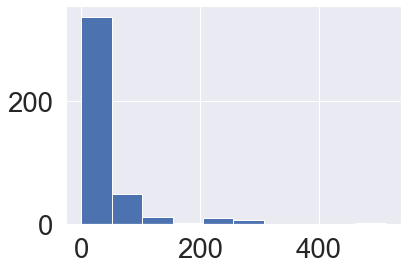

In [26]:
plt.hist(test_df.Fare)

In [27]:
train_df.Fare = np.log1p(train_df.Fare)
test_df.Fare = np.log1p(test_df.Fare)

(array([ 15.,   0.,   2., 350., 167., 182.,  85.,  59.,  28.,   3.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

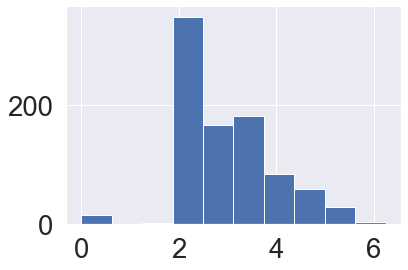

In [28]:
plt.hist(train_df.Fare)

(array([  2.,   0.,   1., 164.,  83.,  79.,  44.,  21.,  22.,   1.]),
 array([0.        , 0.62409174, 1.24818347, 1.87227521, 2.49636694,
        3.12045868, 3.74455041, 4.36864215, 4.99273388, 5.61682562,
        6.24091735]),
 <a list of 10 Patch objects>)

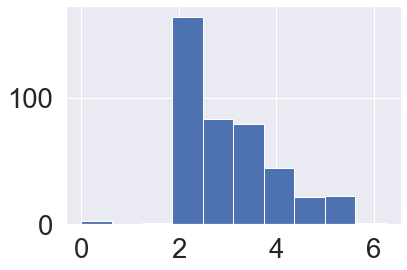

In [29]:
plt.hist(test_df.Fare)

## 전처리

### - 가족수 컬럼 추가 : 4인 가족 생존률 높음, 5~11인 가족 생존률 낮음

In [30]:
train_df['Family'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family'] = test_df['SibSp'] + test_df['Parch'] + 1

In [31]:
pd.crosstab(train_df.Family, train_df.Survived, margins=True)

Survived,0,1,All
Family,,,
1,374,163,537
2,72,89,161
3,43,59,102
4,8,21,29
5,12,3,15
6,19,3,22
7,8,4,12
8,6,0,6
11,7,0,7


### - Sir 컬럼 추가

In [32]:
train_name_list = train_df.Name.tolist()
test_name_list = test_df.Name.tolist()

In [33]:
import re
sir_list = re.compile('Mrs|Mr|Miss|Master|Don|Dr|Ms|Major|Mlle|Mne|Countess|Lady|Don|Countess')

In [34]:
sir = []
def transfer(name_list):
    for name in name_list:
        if sir_list.search(name) != None:
            if sir_list.search(name)[0] in ['Countess','Lady','Mrs']:
                sir.append('Mrs')
            elif sir_list.search(name)[0] in ['Mme', 'Ms', 'Mlle']:
                sir.append('Miss')
            elif sir_list.search(name)[0] in ['Don','Dr','Major']:
                sir.append('Mr')
            else:
                sir.append(sir_list.search(name)[0])
        else:
            sir.append('Other')

In [35]:
transfer(train_name_list)

In [36]:
pd.Series(sir)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Length: 891, dtype: object

In [37]:
pd.Series(sir).value_counts()

Mr        530
Miss      184
Mrs       126
Master     40
Other      11
dtype: int64

In [38]:
train_df['Sir'] = pd.Series(sir)

pd.crosstab(train_df.Sir, train_df.Survived, margins=True)

Survived,0,1,All
Sir,,,
Master,17,23,40
Miss,55,129,184
Mr,442,88,530
Mrs,26,100,126
Other,9,2,11
All,549,342,891


In [39]:
transfer(test_name_list)

In [40]:
pd.Series(sir)

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305        Mr
1306        Mr
1307        Mr
1308    Master
Length: 1309, dtype: object

In [41]:
pd.Series(sir).value_counts()

Mr        775
Miss      261
Mrs       198
Master     60
Other      15
dtype: int64

In [42]:
test_df['Sir'] = pd.Series(sir)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Sir
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,2.178064,NaN,Q,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,2.079442,NaN,S,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,2.369075,NaN,Q,1,Miss
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,2.268252,NaN,S,1,Mrs
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,2.586824,NaN,S,3,Mr


### - 결측치 처리 (Age, Embarked, Fare)
* 나이 결측치는 Sir 컬럼의 값을 참조해 같은 Sir 값을 가진 행의 평균값으로 대체

In [43]:
train_sir = train_df.groupby('Sir').mean()
train_sir

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family
Sir,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.381361,4.675000
Miss,413.945652,0.701087,2.288043,21.845638,0.706522,0.543478,3.186588,2.250000
Mr,454.490566,0.166038,2.384906,32.651589,0.292453,0.150943,2.728141,1.443396
Mrs,456.706349,0.793651,1.984127,36.000000,0.690476,0.817460,3.485083,2.507937
Other,563.272727,0.181818,1.545455,46.090909,0.181818,0.181818,2.976284,1.363636


In [44]:
test_sir = test_df.groupby('Sir').mean()
test_sir

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family
Sir,,,,,,,
Master,1073.782609,2.130435,30.476190,0.304348,0.304348,3.069824,1.608696
Miss,1112.950000,2.240000,32.175000,0.310000,0.230000,2.927764,1.540000
Mr,1099.051282,2.243590,29.826906,0.474359,0.461538,3.045780,1.935897
Mrs,1093.929825,2.473684,28.847447,0.631579,0.421053,3.008669,2.052632
Other,1121.250000,2.000000,27.333333,0.500000,0.500000,3.291244,2.000000


In [45]:
train_sir.Age

Sir
Master     4.574167
Miss      21.845638
Mr        32.651589
Mrs       36.000000
Other     46.090909
Name: Age, dtype: float64

In [46]:
test_sir.Age

Sir
Master    30.476190
Miss      32.175000
Mr        29.826906
Mrs       28.847447
Other     27.333333
Name: Age, dtype: float64

In [47]:
train_age_nan_index = train_df.index[train_df.Age.isnull()]
test_age_nan_index = test_df.index[test_df.Age.isnull()]

In [48]:
train_age_nan_index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [49]:
test_age_nan_index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [50]:
def process_age_nan(age_nan_index):
    if len(age_nan_index) == len(train_age_nan_index):
        for index in age_nan_index:
            row_sir = train_df.loc[index]['Sir']
            print('index:',index, 'row_sir:', row_sir)
            sir_mean = train_sir.loc[row_sir]['Age']
            print('sir_mean:', sir_mean)
            train_df.at[index, 'Age'] = sir_mean
    else:
        for index in age_nan_index:
            row_sir = test_df.loc[index]['Sir']
            print('index:',index, 'row_sir:', row_sir)
            sir_mean = test_sir.loc[row_sir]['Age']
            print('sir_mean:', sir_mean)
            test_df.at[index, 'Age'] = sir_mean

In [51]:
process_age_nan(train_age_nan_index)

index: 5 row_sir: Mr
sir_mean: 32.65158924205379
index: 17 row_sir: Mr
sir_mean: 32.65158924205379
index: 19 row_sir: Mrs
sir_mean: 36.0
index: 26 row_sir: Mr
sir_mean: 32.65158924205379
index: 28 row_sir: Miss
sir_mean: 21.845637583892618
index: 29 row_sir: Mr
sir_mean: 32.65158924205379
index: 31 row_sir: Mrs
sir_mean: 36.0
index: 32 row_sir: Miss
sir_mean: 21.845637583892618
index: 36 row_sir: Mr
sir_mean: 32.65158924205379
index: 42 row_sir: Mr
sir_mean: 32.65158924205379
index: 45 row_sir: Mr
sir_mean: 32.65158924205379
index: 46 row_sir: Mr
sir_mean: 32.65158924205379
index: 47 row_sir: Mr
sir_mean: 32.65158924205379
index: 48 row_sir: Mr
sir_mean: 32.65158924205379
index: 55 row_sir: Mr
sir_mean: 32.65158924205379
index: 64 row_sir: Mr
sir_mean: 32.65158924205379
index: 65 row_sir: Master
sir_mean: 4.574166666666667
index: 76 row_sir: Mr
sir_mean: 32.65158924205379
index: 77 row_sir: Mr
sir_mean: 32.65158924205379
index: 82 row_sir: Miss
sir_mean: 21.845637583892618
index: 87 ro

In [52]:
process_age_nan(test_age_nan_index)

index: 10 row_sir: Miss
sir_mean: 32.175
index: 22 row_sir: Miss
sir_mean: 32.175
index: 29 row_sir: Mr
sir_mean: 29.826906077348067
index: 33 row_sir: Mr
sir_mean: 29.826906077348067
index: 36 row_sir: Mr
sir_mean: 29.826906077348067
index: 39 row_sir: Miss
sir_mean: 32.175
index: 41 row_sir: Mrs
sir_mean: 28.847446808510636
index: 47 row_sir: Mr
sir_mean: 29.826906077348067
index: 54 row_sir: Mr
sir_mean: 29.826906077348067
index: 58 row_sir: Miss
sir_mean: 32.175
index: 65 row_sir: Master
sir_mean: 30.476190476190474
index: 76 row_sir: Mr
sir_mean: 29.826906077348067
index: 83 row_sir: Mr
sir_mean: 29.826906077348067
index: 84 row_sir: Miss
sir_mean: 32.175
index: 85 row_sir: Mrs
sir_mean: 28.847446808510636
index: 88 row_sir: Miss
sir_mean: 32.175
index: 91 row_sir: Mr
sir_mean: 29.826906077348067
index: 93 row_sir: Mr
sir_mean: 29.826906077348067
index: 102 row_sir: Mr
sir_mean: 29.826906077348067
index: 107 row_sir: Mr
sir_mean: 29.826906077348067
index: 108 row_sir: Mr
sir_mean:

In [53]:
train_df.Age.isnull().sum()

0

In [54]:
test_df.Age.isnull().sum()

0

* 승선(승선한 항구)값 결측치는 Pclass 컬럼의 값을 참조해 가장 많은 값을 가진 행의 대체

In [55]:
train_emb_nan_index = train_df.index[train_df.Embarked.isnull()]
train_emb_nan_index

Int64Index([61, 829], dtype='int64')

In [56]:
print('No.61 Pclass', train_df.loc[61].Pclass)
print('No.829 Pclass', train_df.loc[829].Pclass)

No.61 Pclass 1
No.829 Pclass 1


In [57]:
train_df.Embarked.fillna('S', inplace=True)
train_df.Embarked.isnull().sum()

0

* 표값 결측치는 Pclass 컬럼의 값을 참조해 같은 Pclass 값을 가진 행의 평균값으로 대체

In [58]:
test_fare = test_df.groupby('Pclass').mean()
test_fare

,PassengerId,Age,SibSp,Parch,Fare,Family
Pclass,,,,,,
1,1098.224299,40.042121,0.476636,0.383178,4.188546,1.859813
2,1117.935484,28.866150,0.376344,0.344086,3.010564,1.720430
3,1094.178899,26.066639,0.463303,0.417431,2.440329,1.880734


In [59]:
test_fare_nan_index = test_df.index[test_df.Fare.isnull()]
test_fare_nan_index

Int64Index([152], dtype='int64')

In [60]:
for index in test_fare_nan_index:
    row_pclass = test_df.loc[index]['Pclass']
    print('index:',index, 'row_pclass:', row_pclass)
    fare_mean = test_fare.loc[row_pclass]['Fare']
    print('fare_mean:', fare_mean)
    test_df.at[index, 'Fare'] = fare_mean

index: 152 row_pclass: 3
fare_mean: 2.440328699746799


In [61]:
test_df.Fare.isnull().sum()

0

## 범주형 데이터 처리
### - Age 데이터 처리

In [62]:
def category_age(age):
    return age//10

In [63]:
train_df['cate_age'] = train_df.Age.apply(category_age)
train_df['cate_age']

0      2.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    1.0
888    2.0
889    2.0
890    3.0
Name: cate_age, Length: 891, dtype: float64

In [64]:
test_df['cate_age'] = test_df.Age.apply(category_age)
test_df['cate_age']

0      3.0
1      4.0
2      6.0
3      2.0
4      2.0
      ... 
413    2.0
414    3.0
415    3.0
416    2.0
417    3.0
Name: cate_age, Length: 418, dtype: float64

### - Sir 데이터 처리

In [65]:
def unique_sir(df):
    for data in enumerate(df.Sir.unique()):
        df.Sir.replace(data[1], data[0], inplace=True)

In [66]:
unique_sir(train_df)
unique_sir(test_df)

In [67]:
train_df.Sir.head()

0    0
1    1
2    2
3    1
4    0
Name: Sir, dtype: int64

In [68]:
test_df.Sir.head()

0    0
1    1
2    2
3    1
4    0
Name: Sir, dtype: int64

### - Embarked 데이터 처리

In [69]:
def unique_emb(df):
    for data in enumerate(df.Embarked.unique()):
        df.Embarked.replace(data[1], data[0], inplace=True)

In [70]:
unique_emb(train_df)
unique_emb(test_df)

In [71]:
train_df.Embarked.head()

0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64

In [72]:
test_df.Embarked.head()

0    0
1    1
2    0
3    1
4    1
Name: Embarked, dtype: int64

### - Sex 데이터 처리

In [73]:
def unique_sex(df):
    for data in enumerate(df.Sex.unique()):
        df.Sex.replace(data[1], data[0], inplace=True)

In [74]:
unique_sex(train_df)
unique_sex(test_df)

In [75]:
train_df.Sex.head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [76]:
test_df.Sex.head()

0    0
1    1
2    0
3    0
4    1
Name: Sex, dtype: int64

## 컬럼 삭제
* Survived와 관련 없는 컬럼
* 결측치가 대부분인 컬럼
* 한가지 값이 대부분인 컬럼

In [77]:
train_df.drop(['Name', 'Age', 'Ticket', 'Cabin'], axis=1, inplace=True)
test_df.drop(['Name', 'Age', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [78]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Family,Sir,cate_age
0,1,0,3,0,1,0,2.110213,0,2,0,2.0
1,2,1,1,1,1,0,4.280593,1,2,1,3.0
2,3,1,3,1,0,0,2.188856,0,1,2,2.0
3,4,1,1,1,1,0,3.990834,0,2,1,3.0
4,5,0,3,0,0,0,2.202765,0,1,0,3.0


## 분류 - Decision Tree

In [79]:
y_label = train_df.Survived
train_df.drop('Survived', axis=1, inplace=True)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_df, y_label, train_size=0.99, test_size=0.01, random_state=4564561)

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
dtclf = DecisionTreeClassifier()
dtclf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [83]:
dtclf = dtclf.fit(X_train, y_train)

In [84]:
dt_pred = dtclf.predict(X_val)
dt_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, dt_pred, labels=[1,0])

array([[2, 0],
       [1, 6]], dtype=int64)

In [86]:
from sklearn.metrics import accuracy_score
val_accuracy = accuracy_score(y_val, dt_pred)
val_accuracy

0.8888888888888888

In [87]:
result = dtclf.predict(test_df)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [88]:
test_dt = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':result})
test_dt

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [89]:
test_dt.to_csv('test_dt.csv')

## 분류 - RandomForest

In [90]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10000)
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [91]:
rfc.fit(X_train, y_train)
pred = rfc.predict(X_val)
print(pred == y_val)

528     True
317     True
425     True
221     True
445     True
179     True
781     True
64      True
671    False
Name: Survived, dtype: bool


In [92]:
rfc.score(X_val, y_val)

0.8888888888888888

In [93]:
pred = rfc.predict(test_df)
pred

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [94]:
test_rf = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':pred})
test_rf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [95]:
test_rf.to_csv('test_rf.csv')

## 분류 - DeepLearning

In [96]:
X = train_df
y = y_label

In [97]:
import keras
import os
from keras.models import Sequential
from keras.layers import Dense

os.environ["cuda_visible_devices"]= '0'

Using TensorFlow backend.


In [98]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=10))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2816      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (De

In [99]:
model.fit(X, y, epochs=6000)


Epoch 1/6000
891/891 [==============================] - 0s 319us/step - loss: 0.9333 - acc: 0.5241
Epoch 2/6000
891/891 [==============================] - 0s 56us/step - loss: 0.8163 - acc: 0.5645
Epoch 3/6000
891/891 [==============================] - 0s 56us/step - loss: 0.7147 - acc: 0.6027
Epoch 4/6000
891/891 [==============================] - 0s 60us/step - loss: 0.7669 - acc: 0.5499
Epoch 5/6000
891/891 [==============================] - 0s 63us/step - loss: 0.6926 - acc: 0.5982
Epoch 6/6000
891/891 [==============================] - 0s 59us/step - loss: 0.6881 - acc: 0.5982
Epoch 7/6000
891/891 [==============================] - 0s 60us/step - loss: 0.7445 - acc: 0.5544
Epoch 8/6000
891/891 [==============================] - 0s 59us/step - loss: 0.6770 - acc: 0.6689
Epoch 9/6000
891/891 [==============================] - 0s 59us/step - loss: 0.6430 - acc: 0.6420
Epoch 10/6000
891/891 [==============================] - 0s 58us/step - loss: 0.6568 - acc: 0.6487
Epoch 11/6000
891

891/891 [==============================] - 0s 59us/step - loss: 0.4345 - acc: 0.8081
Epoch 82/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4323 - acc: 0.8025
Epoch 83/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4204 - acc: 0.8070
Epoch 84/6000
891/891 [==============================] - 0s 65us/step - loss: 0.4378 - acc: 0.8070
Epoch 85/6000
891/891 [==============================] - 0s 51us/step - loss: 0.4243 - acc: 0.8103
Epoch 86/6000
891/891 [==============================] - 0s 52us/step - loss: 0.4200 - acc: 0.8081
Epoch 87/6000
891/891 [==============================] - 0s 75us/step - loss: 0.4277 - acc: 0.8058
Epoch 88/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4399 - acc: 0.7980
Epoch 89/6000
891/891 [==============================] - 0s 59us/step - loss: 0.4159 - acc: 0.8058
Epoch 90/6000
891/891 [==============================] - 0s 56us/step - loss: 0.4328 - acc: 0.8070
Epoch 91/6000
891/891 [=

891/891 [==============================] - 0s 57us/step - loss: 0.4406 - acc: 0.8036
Epoch 164/6000
891/891 [==============================] - 0s 59us/step - loss: 0.4106 - acc: 0.8070
Epoch 165/6000
891/891 [==============================] - 0s 56us/step - loss: 0.4239 - acc: 0.8081
Epoch 166/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4176 - acc: 0.8081
Epoch 167/6000
891/891 [==============================] - 0s 56us/step - loss: 0.4133 - acc: 0.8092
Epoch 168/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4283 - acc: 0.8070
Epoch 169/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4128 - acc: 0.8182
Epoch 170/6000
891/891 [==============================] - 0s 56us/step - loss: 0.4282 - acc: 0.8036
Epoch 171/6000
891/891 [==============================] - 0s 59us/step - loss: 0.4157 - acc: 0.8148
Epoch 172/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4239 - acc: 0.8070
Epoch 173/6000


891/891 [==============================] - 0s 56us/step - loss: 0.3999 - acc: 0.8193
Epoch 246/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4355 - acc: 0.8013
Epoch 247/6000
891/891 [==============================] - 0s 58us/step - loss: 0.4127 - acc: 0.8058
Epoch 248/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3925 - acc: 0.8193
Epoch 249/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3840 - acc: 0.8204
Epoch 250/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4413 - acc: 0.7991
Epoch 251/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3942 - acc: 0.8283
Epoch 252/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3862 - acc: 0.8294
Epoch 253/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3781 - acc: 0.8227
Epoch 254/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3758 - acc: 0.8294
Epoch 255/6000


891/891 [==============================] - 0s 58us/step - loss: 0.3640 - acc: 0.8361
Epoch 328/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3613 - acc: 0.8305
Epoch 329/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3776 - acc: 0.8373
Epoch 330/6000
891/891 [==============================] - 0s 59us/step - loss: 0.3633 - acc: 0.8305
Epoch 331/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3565 - acc: 0.8361
Epoch 332/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3616 - acc: 0.8418
Epoch 333/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3695 - acc: 0.8440
Epoch 334/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3611 - acc: 0.8418
Epoch 335/6000
891/891 [==============================] - 0s 57us/step - loss: 0.4098 - acc: 0.8126
Epoch 336/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3830 - acc: 0.8081
Epoch 337/6000


891/891 [==============================] - 0s 56us/step - loss: 0.3468 - acc: 0.8384
Epoch 410/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3440 - acc: 0.8451
Epoch 411/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3467 - acc: 0.8418
Epoch 412/6000
891/891 [==============================] - 0s 55us/step - loss: 0.3532 - acc: 0.8440
Epoch 413/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3523 - acc: 0.8395
Epoch 414/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3524 - acc: 0.8406
Epoch 415/6000
891/891 [==============================] - 0s 55us/step - loss: 0.3562 - acc: 0.8316
Epoch 416/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3547 - acc: 0.8339
Epoch 417/6000
891/891 [==============================] - 0s 58us/step - loss: 0.3581 - acc: 0.8474
Epoch 418/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3615 - acc: 0.8474
Epoch 419/6000


891/891 [==============================] - 0s 56us/step - loss: 0.3340 - acc: 0.8451
Epoch 492/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3463 - acc: 0.8462
Epoch 493/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3283 - acc: 0.8485
Epoch 494/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3203 - acc: 0.8474
Epoch 495/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3184 - acc: 0.8586
Epoch 496/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3192 - acc: 0.8575
Epoch 497/6000
891/891 [==============================] - 0s 58us/step - loss: 0.3222 - acc: 0.8597
Epoch 498/6000
891/891 [==============================] - 0s 55us/step - loss: 0.3596 - acc: 0.8328
Epoch 499/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3700 - acc: 0.8215
Epoch 500/6000
891/891 [==============================] - 0s 58us/step - loss: 0.3364 - acc: 0.8462
Epoch 501/6000


891/891 [==============================] - 0s 59us/step - loss: 0.3260 - acc: 0.8642
Epoch 574/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3088 - acc: 0.8575
Epoch 575/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2999 - acc: 0.8608
Epoch 576/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3303 - acc: 0.8485
Epoch 577/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3095 - acc: 0.8676
Epoch 578/6000
891/891 [==============================] - 0s 57us/step - loss: 0.2958 - acc: 0.8698
Epoch 579/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3100 - acc: 0.8608
Epoch 580/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3085 - acc: 0.8620
Epoch 581/6000
891/891 [==============================] - 0s 55us/step - loss: 0.3073 - acc: 0.8620
Epoch 582/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3398 - acc: 0.8474
Epoch 583/6000


891/891 [==============================] - 0s 57us/step - loss: 0.2792 - acc: 0.8754
Epoch 656/6000
891/891 [==============================] - 0s 58us/step - loss: 0.3008 - acc: 0.8586
Epoch 657/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2837 - acc: 0.8709
Epoch 658/6000
891/891 [==============================] - 0s 58us/step - loss: 0.2914 - acc: 0.8687
Epoch 659/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2875 - acc: 0.8687
Epoch 660/6000
891/891 [==============================] - 0s 57us/step - loss: 0.2952 - acc: 0.8608
Epoch 661/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3269 - acc: 0.8642
Epoch 662/6000
891/891 [==============================] - 0s 55us/step - loss: 0.3249 - acc: 0.8586
Epoch 663/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3613 - acc: 0.8418
Epoch 664/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3168 - acc: 0.8586
Epoch 665/6000


891/891 [==============================] - 0s 58us/step - loss: 0.2974 - acc: 0.8597
Epoch 738/6000
891/891 [==============================] - 0s 57us/step - loss: 0.2979 - acc: 0.8642
Epoch 739/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3016 - acc: 0.8698
Epoch 740/6000
891/891 [==============================] - 0s 57us/step - loss: 0.2779 - acc: 0.8709
Epoch 741/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2705 - acc: 0.8765
Epoch 742/6000
891/891 [==============================] - 0s 57us/step - loss: 0.2659 - acc: 0.8833
Epoch 743/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2683 - acc: 0.8721
Epoch 744/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2568 - acc: 0.8844
Epoch 745/6000
891/891 [==============================] - 0s 57us/step - loss: 0.2903 - acc: 0.8709
Epoch 746/6000
891/891 [==============================] - 0s 57us/step - loss: 0.3424 - acc: 0.8440
Epoch 747/6000


891/891 [==============================] - 0s 54us/step - loss: 0.2827 - acc: 0.8799
Epoch 820/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2812 - acc: 0.8698
Epoch 821/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2685 - acc: 0.8810
Epoch 822/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2561 - acc: 0.8855
Epoch 823/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2607 - acc: 0.8900
Epoch 824/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2596 - acc: 0.8900
Epoch 825/6000
891/891 [==============================] - 0s 55us/step - loss: 0.3168 - acc: 0.8530
Epoch 826/6000
891/891 [==============================] - 0s 54us/step - loss: 0.3095 - acc: 0.8586
Epoch 827/6000
891/891 [==============================] - 0s 55us/step - loss: 0.3076 - acc: 0.8507
Epoch 828/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2816 - acc: 0.8777
Epoch 829/6000


891/891 [==============================] - 0s 56us/step - loss: 0.2506 - acc: 0.8878
Epoch 902/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2537 - acc: 0.8911
Epoch 903/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2653 - acc: 0.8799
Epoch 904/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2513 - acc: 0.8934
Epoch 905/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2914 - acc: 0.8799
Epoch 906/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2991 - acc: 0.8687
Epoch 907/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2745 - acc: 0.8822
Epoch 908/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2654 - acc: 0.8923
Epoch 909/6000
891/891 [==============================] - 0s 53us/step - loss: 0.2537 - acc: 0.8878
Epoch 910/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2411 - acc: 0.8900
Epoch 911/6000


891/891 [==============================] - 0s 56us/step - loss: 0.2431 - acc: 0.8889
Epoch 984/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2418 - acc: 0.9035
Epoch 985/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2653 - acc: 0.8833
Epoch 986/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2439 - acc: 0.8945
Epoch 987/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2390 - acc: 0.8956
Epoch 988/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2921 - acc: 0.8698
Epoch 989/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2852 - acc: 0.8709
Epoch 990/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2735 - acc: 0.8844
Epoch 991/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2474 - acc: 0.8911
Epoch 992/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2760 - acc: 0.8765
Epoch 993/6000


891/891 [==============================] - 0s 56us/step - loss: 0.2262 - acc: 0.9035
Epoch 1065/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2341 - acc: 0.8967
Epoch 1066/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2321 - acc: 0.8967
Epoch 1067/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2326 - acc: 0.9012
Epoch 1068/6000
891/891 [==============================] - 0s 59us/step - loss: 0.2576 - acc: 0.8945
Epoch 1069/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2517 - acc: 0.8866
Epoch 1070/6000
891/891 [==============================] - 0s 53us/step - loss: 0.2353 - acc: 0.8967
Epoch 1071/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2724 - acc: 0.8945
Epoch 1072/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2543 - acc: 0.8900
Epoch 1073/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2549 - acc: 0.8878
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.2587 - acc: 0.8844
Epoch 1146/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2511 - acc: 0.8967
Epoch 1147/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2549 - acc: 0.8889
Epoch 1148/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2537 - acc: 0.8900
Epoch 1149/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2445 - acc: 0.8990
Epoch 1150/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2523 - acc: 0.8923
Epoch 1151/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2421 - acc: 0.8945
Epoch 1152/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2422 - acc: 0.8878
Epoch 1153/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2244 - acc: 0.9024
Epoch 1154/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2564 - acc: 0.8945
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.2635 - acc: 0.8866
Epoch 1227/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2427 - acc: 0.8945
Epoch 1228/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2618 - acc: 0.8866
Epoch 1229/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2646 - acc: 0.8799
Epoch 1230/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2487 - acc: 0.8855
Epoch 1231/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2389 - acc: 0.8956
Epoch 1232/6000
891/891 [==============================] - 0s 53us/step - loss: 0.2561 - acc: 0.8855
Epoch 1233/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2486 - acc: 0.8934
Epoch 1234/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2556 - acc: 0.8900
Epoch 1235/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2371 - acc: 0.8945
Epoch 

891/891 [==============================] - 0s 53us/step - loss: 0.2209 - acc: 0.9057
Epoch 1308/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2179 - acc: 0.9035
Epoch 1309/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2096 - acc: 0.9068
Epoch 1310/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2384 - acc: 0.9012
Epoch 1311/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2508 - acc: 0.8934
Epoch 1312/6000
891/891 [==============================] - 0s 53us/step - loss: 0.2393 - acc: 0.8934
Epoch 1313/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2319 - acc: 0.8990
Epoch 1314/6000
891/891 [==============================] - 0s 53us/step - loss: 0.2236 - acc: 0.8911
Epoch 1315/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2251 - acc: 0.9001
Epoch 1316/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2115 - acc: 0.9068
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.2029 - acc: 0.9046
Epoch 1389/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2003 - acc: 0.9057
Epoch 1390/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2048 - acc: 0.9125
Epoch 1391/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2021 - acc: 0.9091
Epoch 1392/6000
891/891 [==============================] - 0s 53us/step - loss: 0.2006 - acc: 0.9125
Epoch 1393/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2156 - acc: 0.9035
Epoch 1394/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2320 - acc: 0.8967
Epoch 1395/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2184 - acc: 0.9091
Epoch 1396/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1933 - acc: 0.9169
Epoch 1397/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1932 - acc: 0.9158
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.2041 - acc: 0.9125
Epoch 1470/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2014 - acc: 0.9080
Epoch 1471/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1858 - acc: 0.9136
Epoch 1472/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1924 - acc: 0.9046
Epoch 1473/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1970 - acc: 0.9203
Epoch 1474/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1893 - acc: 0.9192
Epoch 1475/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2034 - acc: 0.9113
Epoch 1476/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1977 - acc: 0.9057
Epoch 1477/6000
891/891 [==============================] - 0s 53us/step - loss: 0.2081 - acc: 0.9024
Epoch 1478/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2105 - acc: 0.9113
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1906 - acc: 0.9136
Epoch 1551/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1835 - acc: 0.9181
Epoch 1552/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1896 - acc: 0.9125
Epoch 1553/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1835 - acc: 0.9214
Epoch 1554/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1867 - acc: 0.9214
Epoch 1555/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1931 - acc: 0.9091
Epoch 1556/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2162 - acc: 0.9001
Epoch 1557/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2912 - acc: 0.8799
Epoch 1558/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2921 - acc: 0.8732
Epoch 1559/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2052 - acc: 0.9080
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.2288 - acc: 0.9057
Epoch 1632/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2393 - acc: 0.8956
Epoch 1633/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1995 - acc: 0.9102
Epoch 1634/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1949 - acc: 0.9102
Epoch 1635/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1880 - acc: 0.9237
Epoch 1636/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1781 - acc: 0.9192
Epoch 1637/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1853 - acc: 0.9158
Epoch 1638/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1884 - acc: 0.9125
Epoch 1639/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1984 - acc: 0.9125
Epoch 1640/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2044 - acc: 0.9136
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1638 - acc: 0.9282
Epoch 1713/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2241 - acc: 0.9181
Epoch 1714/6000
891/891 [==============================] - 0s 56us/step - loss: 0.3708 - acc: 0.8575
Epoch 1715/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2531 - acc: 0.8911
Epoch 1716/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2160 - acc: 0.9057
Epoch 1717/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2057 - acc: 0.9057
Epoch 1718/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1860 - acc: 0.9125
Epoch 1719/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1848 - acc: 0.9237
Epoch 1720/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1977 - acc: 0.9214
Epoch 1721/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1843 - acc: 0.9226
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1695 - acc: 0.9203
Epoch 1794/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1915 - acc: 0.9125
Epoch 1795/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1966 - acc: 0.9169
Epoch 1796/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1754 - acc: 0.9203
Epoch 1797/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1582 - acc: 0.9293
Epoch 1798/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1599 - acc: 0.9293
Epoch 1799/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1954 - acc: 0.9147
Epoch 1800/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1934 - acc: 0.9169
Epoch 1801/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1871 - acc: 0.9091
Epoch 1802/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2127 - acc: 0.9169
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.3052 - acc: 0.8721
Epoch 1875/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2149 - acc: 0.9068
Epoch 1876/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1879 - acc: 0.9192
Epoch 1877/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1717 - acc: 0.9304
Epoch 1878/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1575 - acc: 0.9315
Epoch 1879/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1549 - acc: 0.9304
Epoch 1880/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1707 - acc: 0.9270
Epoch 1881/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1594 - acc: 0.9293
Epoch 1882/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1643 - acc: 0.9259
Epoch 1883/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1700 - acc: 0.9282
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1800 - acc: 0.9158
Epoch 1956/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1912 - acc: 0.9259
Epoch 1957/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1932 - acc: 0.9203
Epoch 1958/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2119 - acc: 0.9091
Epoch 1959/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1783 - acc: 0.9237
Epoch 1960/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1560 - acc: 0.9270
Epoch 1961/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1560 - acc: 0.9248
Epoch 1962/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1513 - acc: 0.9371
Epoch 1963/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1681 - acc: 0.9259
Epoch 1964/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1491 - acc: 0.9304
Epoch 

891/891 [==============================] - 0s 53us/step - loss: 0.1802 - acc: 0.9192
Epoch 2037/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1446 - acc: 0.9360
Epoch 2038/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1519 - acc: 0.9315
Epoch 2039/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1392 - acc: 0.9383
Epoch 2040/6000
891/891 [==============================] - 0s 59us/step - loss: 0.1765 - acc: 0.9270
Epoch 2041/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1738 - acc: 0.9282
Epoch 2042/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1495 - acc: 0.9327
Epoch 2043/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1506 - acc: 0.9428
Epoch 2044/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1479 - acc: 0.9371
Epoch 2045/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1451 - acc: 0.9383
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1493 - acc: 0.9405
Epoch 2118/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1556 - acc: 0.9327
Epoch 2119/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1457 - acc: 0.9405
Epoch 2120/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1397 - acc: 0.9461
Epoch 2121/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1323 - acc: 0.9405
Epoch 2122/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1437 - acc: 0.9394
Epoch 2123/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1312 - acc: 0.9461
Epoch 2124/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1269 - acc: 0.9439
Epoch 2125/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1479 - acc: 0.9315
Epoch 2126/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1281 - acc: 0.9473
Epoch 

891/891 [==============================] - 0s 52us/step - loss: 0.1531 - acc: 0.9293
Epoch 2199/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1467 - acc: 0.9416
Epoch 2200/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1259 - acc: 0.9428
Epoch 2201/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1287 - acc: 0.9450
Epoch 2202/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1284 - acc: 0.9484
Epoch 2203/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1256 - acc: 0.9495
Epoch 2204/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1405 - acc: 0.9450
Epoch 2205/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1353 - acc: 0.9405
Epoch 2206/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1280 - acc: 0.9473
Epoch 2207/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1461 - acc: 0.9371
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.1257 - acc: 0.9439
Epoch 2280/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1233 - acc: 0.9450
Epoch 2281/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1137 - acc: 0.9540
Epoch 2282/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1213 - acc: 0.9461
Epoch 2283/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1371 - acc: 0.9405
Epoch 2284/6000
891/891 [==============================] - 0s 59us/step - loss: 0.1216 - acc: 0.9473
Epoch 2285/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1178 - acc: 0.9495
Epoch 2286/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1171 - acc: 0.9551
Epoch 2287/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1250 - acc: 0.9495
Epoch 2288/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1813 - acc: 0.9394
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1495 - acc: 0.9315
Epoch 2361/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1393 - acc: 0.9360
Epoch 2362/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1240 - acc: 0.9405
Epoch 2363/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1293 - acc: 0.9405
Epoch 2364/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1471 - acc: 0.9394
Epoch 2365/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2794 - acc: 0.8945
Epoch 2366/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2235 - acc: 0.8934
Epoch 2367/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1858 - acc: 0.9237
Epoch 2368/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2142 - acc: 0.9080
Epoch 2369/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1569 - acc: 0.9349
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1283 - acc: 0.9439
Epoch 2442/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1261 - acc: 0.9450
Epoch 2443/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1479 - acc: 0.9428
Epoch 2444/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1123 - acc: 0.9495
Epoch 2445/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1305 - acc: 0.9450
Epoch 2446/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1425 - acc: 0.9270
Epoch 2447/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1373 - acc: 0.9371
Epoch 2448/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1871 - acc: 0.9293
Epoch 2449/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1565 - acc: 0.9282
Epoch 2450/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1398 - acc: 0.9416
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1675 - acc: 0.9203
Epoch 2523/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1635 - acc: 0.9327
Epoch 2524/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2010 - acc: 0.9091
Epoch 2525/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1834 - acc: 0.9125
Epoch 2526/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1576 - acc: 0.9282
Epoch 2527/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1354 - acc: 0.9450
Epoch 2528/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1331 - acc: 0.9439
Epoch 2529/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1318 - acc: 0.9506
Epoch 2530/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1427 - acc: 0.9338
Epoch 2531/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1470 - acc: 0.9304
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1552 - acc: 0.9349
Epoch 2604/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1326 - acc: 0.9439
Epoch 2605/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1171 - acc: 0.9506
Epoch 2606/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1149 - acc: 0.9517
Epoch 2607/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1108 - acc: 0.9517
Epoch 2608/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1291 - acc: 0.9461
Epoch 2609/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1233 - acc: 0.9461
Epoch 2610/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1141 - acc: 0.9529
Epoch 2611/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1066 - acc: 0.9562
Epoch 2612/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1002 - acc: 0.9585
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1201 - acc: 0.9450
Epoch 2685/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1507 - acc: 0.9315
Epoch 2686/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1266 - acc: 0.9439
Epoch 2687/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1226 - acc: 0.9540
Epoch 2688/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1375 - acc: 0.9416
Epoch 2689/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1212 - acc: 0.9428
Epoch 2690/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1190 - acc: 0.9473
Epoch 2691/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1126 - acc: 0.9585
Epoch 2692/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1172 - acc: 0.9484
Epoch 2693/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1358 - acc: 0.9394
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1223 - acc: 0.9450
Epoch 2766/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1250 - acc: 0.9439
Epoch 2767/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1096 - acc: 0.9540
Epoch 2768/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1053 - acc: 0.9517
Epoch 2769/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1121 - acc: 0.9517
Epoch 2770/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1020 - acc: 0.9596
Epoch 2771/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0932 - acc: 0.9641
Epoch 2772/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0937 - acc: 0.9596
Epoch 2773/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1259 - acc: 0.9383
Epoch 2774/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1634 - acc: 0.9304
Epoch 

891/891 [==============================] - 0s 54us/step - loss: 0.2286 - acc: 0.8990
Epoch 2847/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1677 - acc: 0.9259
Epoch 2848/6000
891/891 [==============================] - 0s 52us/step - loss: 0.2061 - acc: 0.9125
Epoch 2849/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1685 - acc: 0.9248
Epoch 2850/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1329 - acc: 0.9349
Epoch 2851/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1289 - acc: 0.9450
Epoch 2852/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1200 - acc: 0.9428
Epoch 2853/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1202 - acc: 0.9428
Epoch 2854/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1160 - acc: 0.9428
Epoch 2855/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1027 - acc: 0.9529
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.2426 - acc: 0.8990
Epoch 2928/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2654 - acc: 0.9057
Epoch 2929/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1688 - acc: 0.9315
Epoch 2930/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1460 - acc: 0.9315
Epoch 2931/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1160 - acc: 0.9529
Epoch 2932/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1125 - acc: 0.9428
Epoch 2933/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1065 - acc: 0.9596
Epoch 2934/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1008 - acc: 0.9540
Epoch 2935/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1296 - acc: 0.9473
Epoch 2936/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1342 - acc: 0.9394
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1063 - acc: 0.9574
Epoch 3009/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1118 - acc: 0.9495
Epoch 3010/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1039 - acc: 0.9529
Epoch 3011/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1067 - acc: 0.9529
Epoch 3012/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0934 - acc: 0.9607
Epoch 3013/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0937 - acc: 0.9585
Epoch 3014/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0951 - acc: 0.9562
Epoch 3015/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1175 - acc: 0.9461
Epoch 3016/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1377 - acc: 0.9439
Epoch 3017/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1090 - acc: 0.9596
Epoch 

891/891 [==============================] - 0s 53us/step - loss: 0.1277 - acc: 0.9473
Epoch 3090/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1025 - acc: 0.9574
Epoch 3091/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1052 - acc: 0.9495
Epoch 3092/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1129 - acc: 0.9484
Epoch 3093/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1497 - acc: 0.9304
Epoch 3094/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0987 - acc: 0.9529
Epoch 3095/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0885 - acc: 0.9618
Epoch 3096/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0857 - acc: 0.9641
Epoch 3097/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0903 - acc: 0.9596
Epoch 3098/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0948 - acc: 0.9540
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1231 - acc: 0.9517
Epoch 3171/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1040 - acc: 0.9562
Epoch 3172/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0877 - acc: 0.9630
Epoch 3173/6000
891/891 [==============================] - 0s 53us/step - loss: 0.0994 - acc: 0.9540
Epoch 3174/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1007 - acc: 0.9551
Epoch 3175/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1012 - acc: 0.9529
Epoch 3176/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1216 - acc: 0.9517
Epoch 3177/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1077 - acc: 0.9574
Epoch 3178/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1548 - acc: 0.9293
Epoch 3179/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2424 - acc: 0.8979
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1087 - acc: 0.9529
Epoch 3252/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0952 - acc: 0.9540
Epoch 3253/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1129 - acc: 0.9517
Epoch 3254/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0981 - acc: 0.9585
Epoch 3255/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1098 - acc: 0.9506
Epoch 3256/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1111 - acc: 0.9461
Epoch 3257/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1608 - acc: 0.9360
Epoch 3258/6000
891/891 [==============================] - 0s 54us/step - loss: 0.3580 - acc: 0.8664
Epoch 3259/6000
891/891 [==============================] - 0s 54us/step - loss: 0.3681 - acc: 0.8586
Epoch 3260/6000
891/891 [==============================] - 0s 54us/step - loss: 0.2347 - acc: 0.8956
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1228 - acc: 0.9461
Epoch 3333/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1178 - acc: 0.9484
Epoch 3334/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1235 - acc: 0.9495
Epoch 3335/6000
891/891 [==============================] - 0s 55us/step - loss: 0.2160 - acc: 0.9360
Epoch 3336/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2194 - acc: 0.9012
Epoch 3337/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1498 - acc: 0.9327
Epoch 3338/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1120 - acc: 0.9562
Epoch 3339/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1056 - acc: 0.9540
Epoch 3340/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1071 - acc: 0.9473
Epoch 3341/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1151 - acc: 0.9495
Epoch 

891/891 [==============================] - 0s 54us/step - loss: 0.1877 - acc: 0.9282
Epoch 3414/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1392 - acc: 0.9349
Epoch 3415/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1260 - acc: 0.9428
Epoch 3416/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1425 - acc: 0.9439
Epoch 3417/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1176 - acc: 0.9529
Epoch 3418/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1105 - acc: 0.9506
Epoch 3419/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1164 - acc: 0.9551
Epoch 3420/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0901 - acc: 0.9607
Epoch 3421/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0936 - acc: 0.9585
Epoch 3422/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0882 - acc: 0.9607
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.0993 - acc: 0.9529
Epoch 3495/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1045 - acc: 0.9517
Epoch 3496/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1045 - acc: 0.9506
Epoch 3497/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1772 - acc: 0.9259
Epoch 3498/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1433 - acc: 0.9371
Epoch 3499/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1830 - acc: 0.9338
Epoch 3500/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1226 - acc: 0.9473
Epoch 3501/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1110 - acc: 0.9529
Epoch 3502/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0964 - acc: 0.9562
Epoch 3503/6000
891/891 [==============================] - 0s 53us/step - loss: 0.0917 - acc: 0.9562
Epoch 

891/891 [==============================] - 0s 54us/step - loss: 0.1149 - acc: 0.9517
Epoch 3576/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0988 - acc: 0.9607
Epoch 3577/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0982 - acc: 0.9484
Epoch 3578/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1014 - acc: 0.9618
Epoch 3579/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1010 - acc: 0.9574
Epoch 3580/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1098 - acc: 0.9416
Epoch 3581/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0979 - acc: 0.9585
Epoch 3582/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0966 - acc: 0.9607
Epoch 3583/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1149 - acc: 0.9517
Epoch 3584/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1289 - acc: 0.9360
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1161 - acc: 0.9562
Epoch 3657/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1130 - acc: 0.9506
Epoch 3658/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1100 - acc: 0.9540
Epoch 3659/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1007 - acc: 0.9618
Epoch 3660/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1077 - acc: 0.9574
Epoch 3661/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0905 - acc: 0.9618
Epoch 3662/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1037 - acc: 0.9529
Epoch 3663/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0898 - acc: 0.9618
Epoch 3664/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0966 - acc: 0.9551
Epoch 3665/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1023 - acc: 0.9551
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.2254 - acc: 0.8889
Epoch 3738/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1428 - acc: 0.9394
Epoch 3739/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1160 - acc: 0.9495
Epoch 3740/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0997 - acc: 0.9585
Epoch 3741/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1061 - acc: 0.9506
Epoch 3742/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1030 - acc: 0.9517
Epoch 3743/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0922 - acc: 0.9607
Epoch 3744/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0966 - acc: 0.9551
Epoch 3745/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0958 - acc: 0.9551
Epoch 3746/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0957 - acc: 0.9596
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1196 - acc: 0.9450
Epoch 3819/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1328 - acc: 0.9394
Epoch 3820/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1442 - acc: 0.9383
Epoch 3821/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1578 - acc: 0.9360
Epoch 3822/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1369 - acc: 0.9461
Epoch 3823/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1179 - acc: 0.9495
Epoch 3824/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0950 - acc: 0.9596
Epoch 3825/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0970 - acc: 0.9574
Epoch 3826/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1112 - acc: 0.9562
Epoch 3827/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1246 - acc: 0.9450
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.1032 - acc: 0.9574
Epoch 3900/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0884 - acc: 0.9607
Epoch 3901/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1070 - acc: 0.9551
Epoch 3902/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1128 - acc: 0.9495
Epoch 3903/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1467 - acc: 0.9461
Epoch 3904/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1215 - acc: 0.9495
Epoch 3905/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1070 - acc: 0.9517
Epoch 3906/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0949 - acc: 0.9574
Epoch 3907/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1101 - acc: 0.9506
Epoch 3908/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1359 - acc: 0.9428
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.0933 - acc: 0.9585
Epoch 3981/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1165 - acc: 0.9439
Epoch 3982/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1070 - acc: 0.9574
Epoch 3983/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1050 - acc: 0.9551
Epoch 3984/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1025 - acc: 0.9506
Epoch 3985/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0848 - acc: 0.9652
Epoch 3986/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0934 - acc: 0.9562
Epoch 3987/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0870 - acc: 0.9596
Epoch 3988/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0981 - acc: 0.9540
Epoch 3989/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0961 - acc: 0.9529
Epoch 

891/891 [==============================] - 0s 67us/step - loss: 0.0917 - acc: 0.9607
Epoch 4062/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1071 - acc: 0.9562
Epoch 4063/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1178 - acc: 0.9461
Epoch 4064/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1118 - acc: 0.9562
Epoch 4065/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1174 - acc: 0.9495
Epoch 4066/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1145 - acc: 0.9495
Epoch 4067/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1063 - acc: 0.9506
Epoch 4068/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1080 - acc: 0.9607
Epoch 4069/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1412 - acc: 0.9371
Epoch 4070/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1044 - acc: 0.9506
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1148 - acc: 0.9540
Epoch 4143/6000
891/891 [==============================] - 0s 58us/step - loss: 0.1036 - acc: 0.9574
Epoch 4144/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0962 - acc: 0.9551
Epoch 4145/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0896 - acc: 0.9618
Epoch 4146/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0877 - acc: 0.9607
Epoch 4147/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0911 - acc: 0.9551
Epoch 4148/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1005 - acc: 0.9506
Epoch 4149/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1063 - acc: 0.9495
Epoch 4150/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0930 - acc: 0.9585
Epoch 4151/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0946 - acc: 0.9562
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.0873 - acc: 0.9607
Epoch 4224/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0812 - acc: 0.9630
Epoch 4225/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0831 - acc: 0.9618
Epoch 4226/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0793 - acc: 0.9618
Epoch 4227/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0975 - acc: 0.9630
Epoch 4228/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0767 - acc: 0.9652
Epoch 4229/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1113 - acc: 0.9484
Epoch 4230/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0992 - acc: 0.9551
Epoch 4231/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0837 - acc: 0.9630
Epoch 4232/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0888 - acc: 0.9529
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.0821 - acc: 0.9652
Epoch 4305/6000
891/891 [==============================] - 0s 58us/step - loss: 0.1028 - acc: 0.9562
Epoch 4306/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0859 - acc: 0.9585
Epoch 4307/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0859 - acc: 0.9596
Epoch 4308/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0809 - acc: 0.9618
Epoch 4309/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0804 - acc: 0.9675
Epoch 4310/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0894 - acc: 0.9630
Epoch 4311/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0748 - acc: 0.9652
Epoch 4312/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0732 - acc: 0.9630
Epoch 4313/6000
891/891 [==============================] - 0s 68us/step - loss: 0.0793 - acc: 0.9618
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.1219 - acc: 0.9450
Epoch 4386/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1132 - acc: 0.9574
Epoch 4387/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0968 - acc: 0.9630
Epoch 4388/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1006 - acc: 0.9540
Epoch 4389/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0892 - acc: 0.9574
Epoch 4390/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1152 - acc: 0.9529
Epoch 4391/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0851 - acc: 0.9596
Epoch 4392/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0872 - acc: 0.9596
Epoch 4393/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0818 - acc: 0.9652
Epoch 4394/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0874 - acc: 0.9574
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1534 - acc: 0.9293
Epoch 4467/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1961 - acc: 0.9169
Epoch 4468/6000
891/891 [==============================] - 0s 59us/step - loss: 0.1976 - acc: 0.9046
Epoch 4469/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1400 - acc: 0.9327
Epoch 4470/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1132 - acc: 0.9540
Epoch 4471/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0976 - acc: 0.9596
Epoch 4472/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1027 - acc: 0.9562
Epoch 4473/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2041 - acc: 0.9259
Epoch 4474/6000
891/891 [==============================] - 0s 57us/step - loss: 0.2176 - acc: 0.9181
Epoch 4475/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1322 - acc: 0.9461
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.0825 - acc: 0.9618
Epoch 4548/6000
891/891 [==============================] - 0s 59us/step - loss: 0.1093 - acc: 0.9551
Epoch 4549/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0920 - acc: 0.9562
Epoch 4550/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1362 - acc: 0.9416
Epoch 4551/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1236 - acc: 0.9450
Epoch 4552/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1038 - acc: 0.9529
Epoch 4553/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1005 - acc: 0.9641
Epoch 4554/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0926 - acc: 0.9574
Epoch 4555/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0886 - acc: 0.9618
Epoch 4556/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1119 - acc: 0.9495
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.0989 - acc: 0.9540
Epoch 4629/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0896 - acc: 0.9596
Epoch 4630/6000
891/891 [==============================] - 0s 60us/step - loss: 0.1096 - acc: 0.9517
Epoch 4631/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2076 - acc: 0.9248
Epoch 4632/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1922 - acc: 0.9192
Epoch 4633/6000
891/891 [==============================] - 0s 59us/step - loss: 0.2086 - acc: 0.9248
Epoch 4634/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1684 - acc: 0.9304
Epoch 4635/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1430 - acc: 0.9282
Epoch 4636/6000
891/891 [==============================] - 0s 59us/step - loss: 0.1965 - acc: 0.9203
Epoch 4637/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1264 - acc: 0.9461
Epoch 

891/891 [==============================] - 0s 58us/step - loss: 0.0903 - acc: 0.9585
Epoch 4710/6000
891/891 [==============================] - 0s 62us/step - loss: 0.0797 - acc: 0.9618
Epoch 4711/6000
891/891 [==============================] - 0s 66us/step - loss: 0.1033 - acc: 0.9585
Epoch 4712/6000
891/891 [==============================] - 0s 54us/step - loss: 0.1231 - acc: 0.9450
Epoch 4713/6000
891/891 [==============================] - 0s 52us/step - loss: 0.1560 - acc: 0.9327
Epoch 4714/6000
891/891 [==============================] - 0s 53us/step - loss: 0.1569 - acc: 0.9383
Epoch 4715/6000
891/891 [==============================] - 0s 65us/step - loss: 0.1152 - acc: 0.9416
Epoch 4716/6000
891/891 [==============================] - 0s 64us/step - loss: 0.0857 - acc: 0.9607
Epoch 4717/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0876 - acc: 0.9618
Epoch 4718/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0864 - acc: 0.9596
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.0690 - acc: 0.9697
Epoch 4791/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0925 - acc: 0.9630
Epoch 4792/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1620 - acc: 0.9394
Epoch 4793/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2281 - acc: 0.9125
Epoch 4794/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1681 - acc: 0.9383
Epoch 4795/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1437 - acc: 0.9383
Epoch 4796/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1350 - acc: 0.9439
Epoch 4797/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0982 - acc: 0.9551
Epoch 4798/6000
891/891 [==============================] - 0s 58us/step - loss: 0.1342 - acc: 0.9473
Epoch 4799/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1123 - acc: 0.9517
Epoch 

891/891 [==============================] - 0s 56us/step - loss: 0.1337 - acc: 0.9450
Epoch 4872/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0882 - acc: 0.9562
Epoch 4873/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1476 - acc: 0.9371
Epoch 4874/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0946 - acc: 0.9585
Epoch 4875/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0960 - acc: 0.9506
Epoch 4876/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0959 - acc: 0.9506
Epoch 4877/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1158 - acc: 0.9473
Epoch 4878/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0993 - acc: 0.9562
Epoch 4879/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0860 - acc: 0.9585
Epoch 4880/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0907 - acc: 0.9596
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.0857 - acc: 0.9618
Epoch 4953/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0810 - acc: 0.9663
Epoch 4954/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0780 - acc: 0.9686
Epoch 4955/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0789 - acc: 0.9641
Epoch 4956/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0726 - acc: 0.9663
Epoch 4957/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0831 - acc: 0.9585
Epoch 4958/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0913 - acc: 0.9562
Epoch 4959/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1253 - acc: 0.9416
Epoch 4960/6000
891/891 [==============================] - 0s 58us/step - loss: 0.1218 - acc: 0.9473
Epoch 4961/6000
891/891 [==============================] - 0s 58us/step - loss: 0.1279 - acc: 0.9416
Epoch 

891/891 [==============================] - 0s 59us/step - loss: 0.1263 - acc: 0.9506
Epoch 5034/6000
891/891 [==============================] - 0s 58us/step - loss: 0.2874 - acc: 0.9035
Epoch 5035/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1849 - acc: 0.9315
Epoch 5036/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1220 - acc: 0.9439
Epoch 5037/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1225 - acc: 0.9428
Epoch 5038/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0939 - acc: 0.9562
Epoch 5039/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0970 - acc: 0.9540
Epoch 5040/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0918 - acc: 0.9562
Epoch 5041/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0799 - acc: 0.9607
Epoch 5042/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0956 - acc: 0.9630
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.0904 - acc: 0.9630
Epoch 5115/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0833 - acc: 0.9663
Epoch 5116/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0773 - acc: 0.9675
Epoch 5117/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0888 - acc: 0.9585
Epoch 5118/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0820 - acc: 0.9618
Epoch 5119/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0844 - acc: 0.9585
Epoch 5120/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1458 - acc: 0.9394
Epoch 5121/6000
891/891 [==============================] - 0s 58us/step - loss: 0.2048 - acc: 0.9248
Epoch 5122/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1325 - acc: 0.9383
Epoch 5123/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1117 - acc: 0.9529
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.0738 - acc: 0.9686
Epoch 5196/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0697 - acc: 0.9675
Epoch 5197/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0730 - acc: 0.9630
Epoch 5198/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0679 - acc: 0.9686
Epoch 5199/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0793 - acc: 0.9630
Epoch 5200/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0950 - acc: 0.9574
Epoch 5201/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0834 - acc: 0.9630
Epoch 5202/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0819 - acc: 0.9585
Epoch 5203/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0800 - acc: 0.9618
Epoch 5204/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0865 - acc: 0.9607
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.1245 - acc: 0.9473
Epoch 5277/6000
891/891 [==============================] - 0s 58us/step - loss: 0.1105 - acc: 0.9517
Epoch 5278/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0878 - acc: 0.9641
Epoch 5279/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0740 - acc: 0.9641
Epoch 5280/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0781 - acc: 0.9686
Epoch 5281/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0789 - acc: 0.9652
Epoch 5282/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0726 - acc: 0.9675
Epoch 5283/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0698 - acc: 0.9697
Epoch 5284/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0656 - acc: 0.9697
Epoch 5285/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0683 - acc: 0.9719
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.0878 - acc: 0.9585
Epoch 5358/6000
891/891 [==============================] - 0s 39us/step - loss: 0.0871 - acc: 0.9663
Epoch 5359/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0748 - acc: 0.9686
Epoch 5360/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0705 - acc: 0.9641
Epoch 5361/6000
891/891 [==============================] - 0s 54us/step - loss: 0.0835 - acc: 0.9641
Epoch 5362/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0787 - acc: 0.9618
Epoch 5363/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0749 - acc: 0.9663
Epoch 5364/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0730 - acc: 0.9630
Epoch 5365/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0670 - acc: 0.9663
Epoch 5366/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0675 - acc: 0.9630
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.1623 - acc: 0.9237
Epoch 5439/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1217 - acc: 0.9506
Epoch 5440/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0870 - acc: 0.9618
Epoch 5441/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0791 - acc: 0.9630
Epoch 5442/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0797 - acc: 0.9607
Epoch 5443/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0716 - acc: 0.9641
Epoch 5444/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0813 - acc: 0.9652
Epoch 5445/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0746 - acc: 0.9663
Epoch 5446/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0722 - acc: 0.9708
Epoch 5447/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0865 - acc: 0.9607
Epoch 

891/891 [==============================] - 0s 60us/step - loss: 0.0917 - acc: 0.9630
Epoch 5520/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0789 - acc: 0.9697
Epoch 5521/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1079 - acc: 0.9562
Epoch 5522/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0808 - acc: 0.9641
Epoch 5523/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0870 - acc: 0.9618
Epoch 5524/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0850 - acc: 0.9607
Epoch 5525/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0778 - acc: 0.9618
Epoch 5526/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0825 - acc: 0.9585
Epoch 5527/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0749 - acc: 0.9686
Epoch 5528/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0799 - acc: 0.9663
Epoch 

891/891 [==============================] - 0s 59us/step - loss: 0.0668 - acc: 0.9719
Epoch 5601/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0928 - acc: 0.9596
Epoch 5602/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1070 - acc: 0.9506
Epoch 5603/6000
891/891 [==============================] - 0s 56us/step - loss: 0.2251 - acc: 0.9248
Epoch 5604/6000
891/891 [==============================] - 0s 58us/step - loss: 0.1505 - acc: 0.9394
Epoch 5605/6000
891/891 [==============================] - 0s 55us/step - loss: 0.1125 - acc: 0.9517
Epoch 5606/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1269 - acc: 0.9461
Epoch 5607/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1133 - acc: 0.9450
Epoch 5608/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0935 - acc: 0.9630
Epoch 5609/6000
891/891 [==============================] - 0s 60us/step - loss: 0.0731 - acc: 0.9618
Epoch 

891/891 [==============================] - 0s 55us/step - loss: 0.0830 - acc: 0.9630
Epoch 5682/6000
891/891 [==============================] - 0s 64us/step - loss: 0.0695 - acc: 0.9641
Epoch 5683/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0682 - acc: 0.9697
Epoch 5684/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0795 - acc: 0.9641
Epoch 5685/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0859 - acc: 0.9630
Epoch 5686/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0652 - acc: 0.9686
Epoch 5687/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0629 - acc: 0.9719
Epoch 5688/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0636 - acc: 0.9697
Epoch 5689/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0773 - acc: 0.9641
Epoch 5690/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0734 - acc: 0.9675
Epoch 

891/891 [==============================] - 0s 57us/step - loss: 0.1416 - acc: 0.9371
Epoch 5763/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0960 - acc: 0.9551
Epoch 5764/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0903 - acc: 0.9652
Epoch 5765/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0726 - acc: 0.9708
Epoch 5766/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0600 - acc: 0.9787
Epoch 5767/6000
891/891 [==============================] - 0s 62us/step - loss: 0.0699 - acc: 0.9641
Epoch 5768/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0758 - acc: 0.9630
Epoch 5769/6000
891/891 [==============================] - 0s 60us/step - loss: 0.0701 - acc: 0.9697
Epoch 5770/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0674 - acc: 0.9697
Epoch 5771/6000
891/891 [==============================] - 0s 59us/step - loss: 0.1085 - acc: 0.9574
Epoch 

891/891 [==============================] - 0s 59us/step - loss: 0.0983 - acc: 0.9540
Epoch 5844/6000
891/891 [==============================] - 0s 59us/step - loss: 0.0734 - acc: 0.9686
Epoch 5845/6000
891/891 [==============================] - 0s 55us/step - loss: 0.0679 - acc: 0.9697
Epoch 5846/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0813 - acc: 0.9630
Epoch 5847/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0926 - acc: 0.9529
Epoch 5848/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1277 - acc: 0.9450
Epoch 5849/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1339 - acc: 0.9461
Epoch 5850/6000
891/891 [==============================] - 0s 57us/step - loss: 0.1166 - acc: 0.9473
Epoch 5851/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1576 - acc: 0.9371
Epoch 5852/6000
891/891 [==============================] - 0s 56us/step - loss: 0.1302 - acc: 0.9394
Epoch 

891/891 [==============================] - 0s 38us/step - loss: 0.0727 - acc: 0.9641
Epoch 5925/6000
891/891 [==============================] - 0s 59us/step - loss: 0.1174 - acc: 0.9540
Epoch 5926/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0851 - acc: 0.9652
Epoch 5927/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0689 - acc: 0.9719
Epoch 5928/6000
891/891 [==============================] - 0s 58us/step - loss: 0.0659 - acc: 0.9719
Epoch 5929/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0768 - acc: 0.9675
Epoch 5930/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0656 - acc: 0.9719
Epoch 5931/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0681 - acc: 0.9663
Epoch 5932/6000
891/891 [==============================] - 0s 56us/step - loss: 0.0717 - acc: 0.9663
Epoch 5933/6000
891/891 [==============================] - 0s 57us/step - loss: 0.0763 - acc: 0.9596
Epoch 

In [100]:
pred = model.predict(test_df)
final = (pred > .5).astype(int).reshape(test_df.shape[0])
final = pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived':final})
final.to_csv('test_dl.csv', index=False)